In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings
from pprint import pprint

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [2]:
def run_svm(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Find the best hyperparameters
    params = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    }
    
    clf = SklearnClassifier(SVC())
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [3]:
# Load the feature matrix and labels for Doc2Vec
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter tuning and training time:  156.82189106941223
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 100}
{'Accuracy': 0.6572316189161201,
 'F1': 0.6568066542429202,
 'Precision': 0.6626485683380642,
 'Recall': 0.6572316189161201}


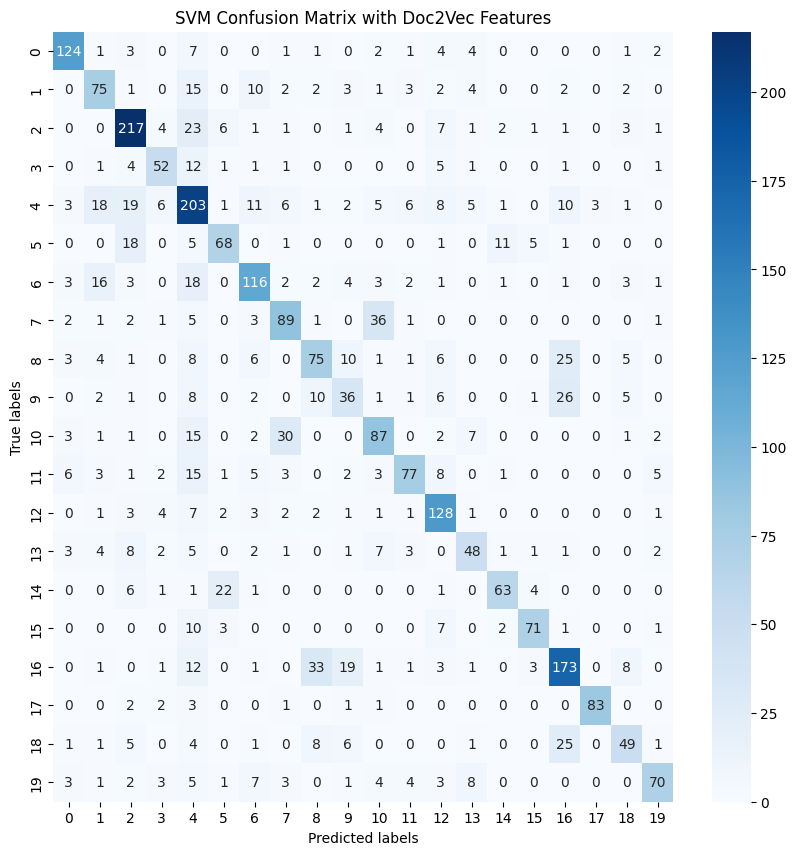

In [4]:
# Run the SVM classifier with Doc2Vec features
run_svm(X, y, 'SVM Confusion Matrix with Doc2Vec Features', scale_features=True)

In [5]:
# Use BERT features
X = embeddings.get_bert()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter tuning and training time:  143.0285840034485
Best hyperparameters:  {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'C': 10}
{'Accuracy': 0.8167069382119434,
 'F1': 0.8173354495495324,
 'Precision': 0.8192918383058538,
 'Recall': 0.8167069382119434}


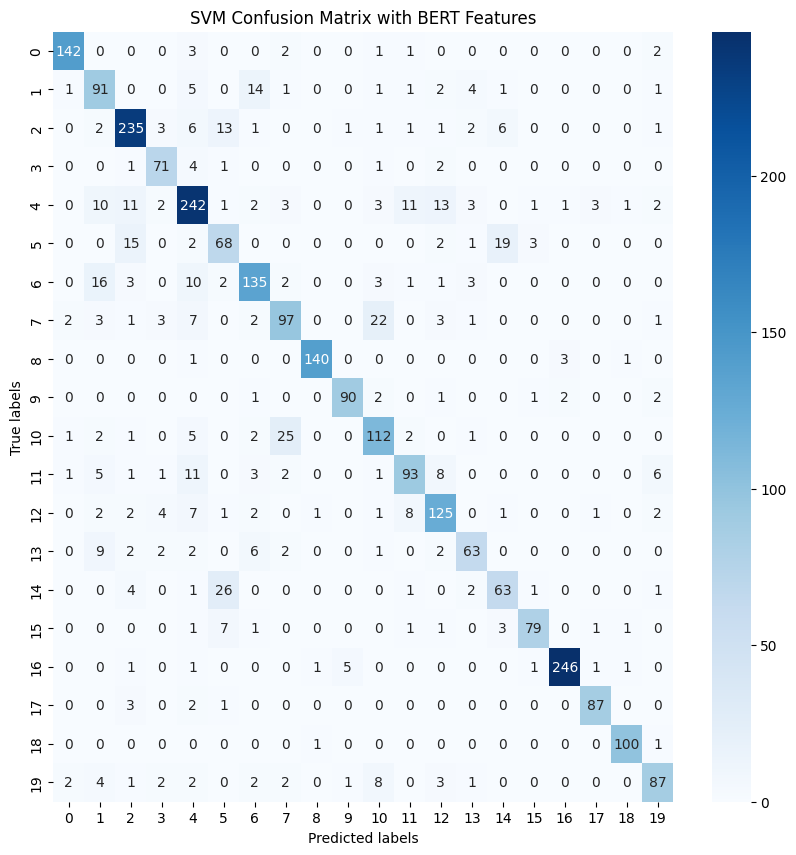

In [6]:
# Run the SVM classifier with BERT features
run_svm(X, y, 'SVM Confusion Matrix with BERT Features', scale_features=False)